In [0]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [52]:
data=pd.read_csv("weatherAUS.csv")
data

,Date,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,12,2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02-12-2008,12,2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03-12-2008,12,2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04-12-2008,12,2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05-12-2008,12,2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,20-06-2017,6,2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,21-06-2017,6,2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,22-06-2017,6,2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,23-06-2017,6,2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [53]:
data.shape

(142193, 26)

In [0]:
col1=['Date']
for i in col1:
  data=data.drop([i],axis='columns')

In [55]:
total_missing_values=data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_values,percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


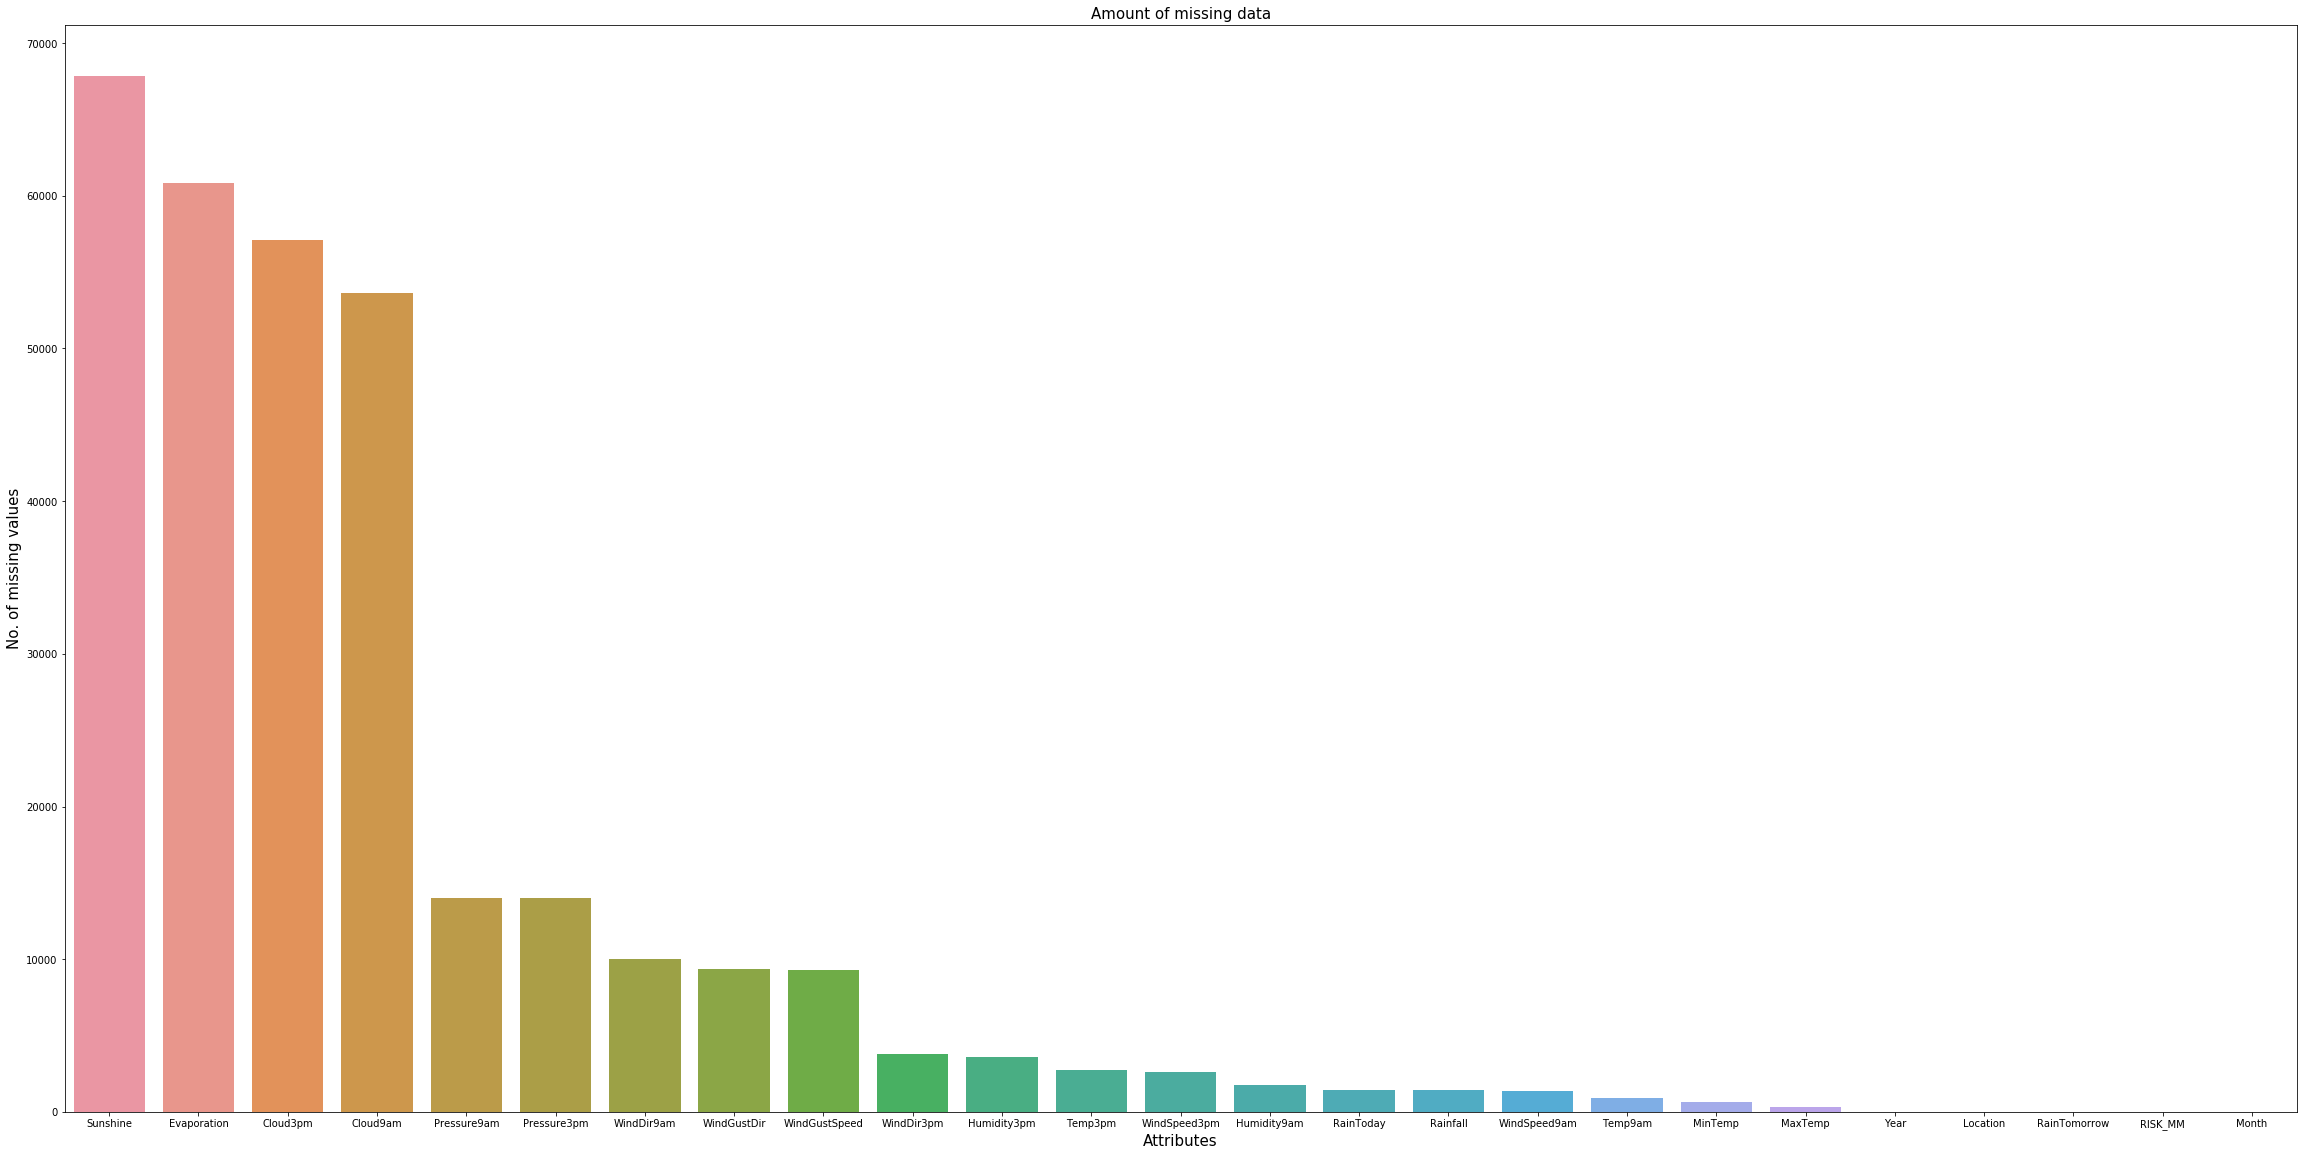

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
f,ax=plt.subplots(figsize=(40,20))
sns.barplot(x=missing_data.index,y=missing_data['Total'])
plt.xlabel("Attributes",fontsize=15)
plt.ylabel("No. of missing values",fontsize=15)
plt.title("Amount of missing data",fontsize=15)
plt.show()

# Attempting to implement geographical density map using geopy

In [0]:
#pip install geopy

In [0]:
#from geopy.extra.rate_limiter import RateLimiter
#from geopy.geocoders import Nominatim



In [0]:
#locator = Nominatim(user_agent="myGeoCoder")
#location = locator.geocode("Australia")

In [0]:
# 1 - conveneint function to delay between geocoding calls
#geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [0]:
# 2- - create location column
#data['locale'] = data['Location'].apply(geocode)


In [0]:
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
#data['point'] = data['locale'].apply(lambda loc: tuple(loc.point) if loc else None)

In [0]:
# 4 - split point column into latitude, longitude and altitude columns

#data[['latitude', 'longitude', 'altitude']] = pd.DataFrame(data['point'].tolist(), index=data.index)

# Merging Australian location coordinates with the original dataset

In [0]:
#ausdata=pd.read_csv('au.csv')

In [0]:
#pd.merge(data,ausdata)

# Attempting to utilize folium to get geographical density map

In [0]:
#pip install folium

In [0]:
#import folium
#import pandas as pd
#from folium import Map
#AUS_COORDINATES = (25.2744, 133.7751)

 
# for speed purposes
#MAX_RECORDS = 1000
  
# create empty map zoomed in on Australia
#map = folium.Map(location=AUS_COORDINATES, zoom_start=12)
 


In [0]:
# add a marker for every record in the filtered data, use a clustered view
#for each in data[0:MAX_RECORDS].iterrows():
    #map.simple_marker(
        #location = [each[1]['longitude'],each[1]['latitude']], 
        #clustered_marker = True)
  
#display(map)

In [0]:
#pip install -U folium

In [0]:
columns1=['WindGustDir','WindDir9am','WindDir3pm','RainToday','Location']

for i in columns1:
    data[i]=pd.Categorical(data[i]).codes
    

In [0]:
data['RainTomorrow']=pd.Categorical(data['RainTomorrow']).codes


In [69]:
data.shape

(142193, 25)

In [70]:
values = data.values
X = values[:,0:23]
X

array([[1.200e+01, 2.008e+03, 2.000e+00, ..., 1.690e+01, 2.180e+01,
        0.000e+00],
       [1.200e+01, 2.008e+03, 2.000e+00, ..., 1.720e+01, 2.430e+01,
        0.000e+00],
       [1.200e+01, 2.008e+03, 2.000e+00, ..., 2.100e+01, 2.320e+01,
        0.000e+00],
       ...,
       [6.000e+00, 2.017e+03, 4.100e+01, ..., 1.090e+01, 2.450e+01,
        0.000e+00],
       [6.000e+00, 2.017e+03, 4.100e+01, ..., 1.250e+01, 2.610e+01,
        0.000e+00],
       [6.000e+00, 2.017e+03, 4.100e+01, ..., 1.510e+01, 2.600e+01,
        0.000e+00]])

In [71]:
y = data['RainTomorrow'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [72]:
data.head(5)

,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12,2008,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0.0,0
1,12,2008,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0.0,0
2,12,2008,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0.0,0
3,12,2008,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1.0,0
4,12,2008,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0


In [0]:
  
from sklearn.preprocessing import Imputer




       
    


In [74]:

imputer = Imputer()
transformed_X = imputer.fit_transform(X)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [75]:
print('Proportion of the number of yes=1 and no=0 in the data:')
print(data['RainTomorrow'].value_counts() / len(data))

Proportion of the number of yes=1 and no=0 in the data:
0    0.775819
1    0.224181
Name: RainTomorrow, dtype: float64


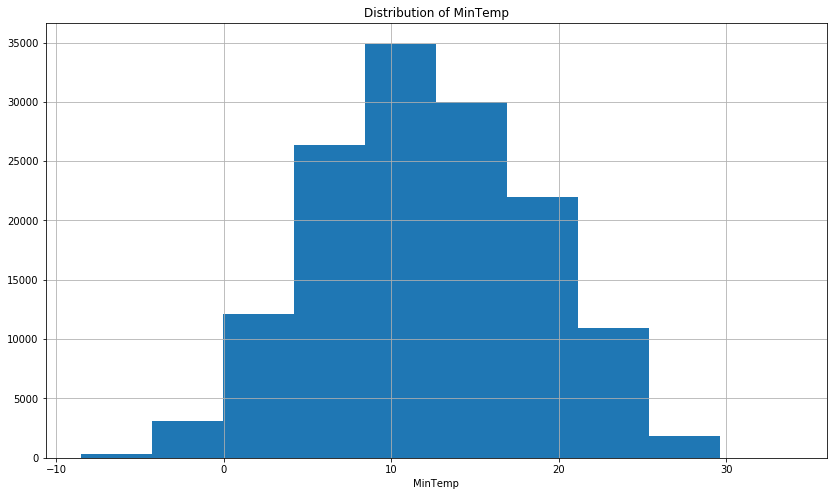

In [76]:

#cl=['MinTemp','MaxTemp','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm''Pressure9am','Pressure3pm''Temp9am','Temp3pm']
plt.rcParams['figure.figsize'] = [14, 8]
data.MinTemp.hist()
plt.title('Distribution of MinTemp')
plt.xlabel('MinTemp')
plt.show()

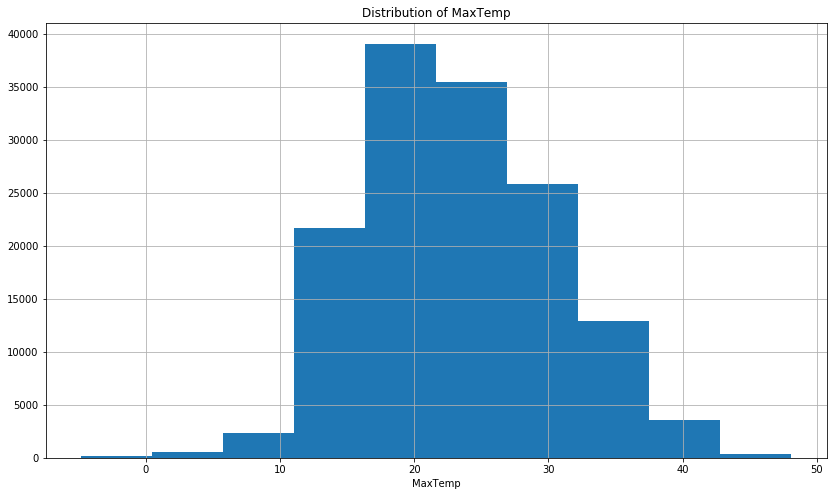

In [77]:
plt.rcParams['figure.figsize'] = [14, 8]
data.MaxTemp.hist()
plt.title('Distribution of MaxTemp')
plt.xlabel('MaxTemp')
plt.show()

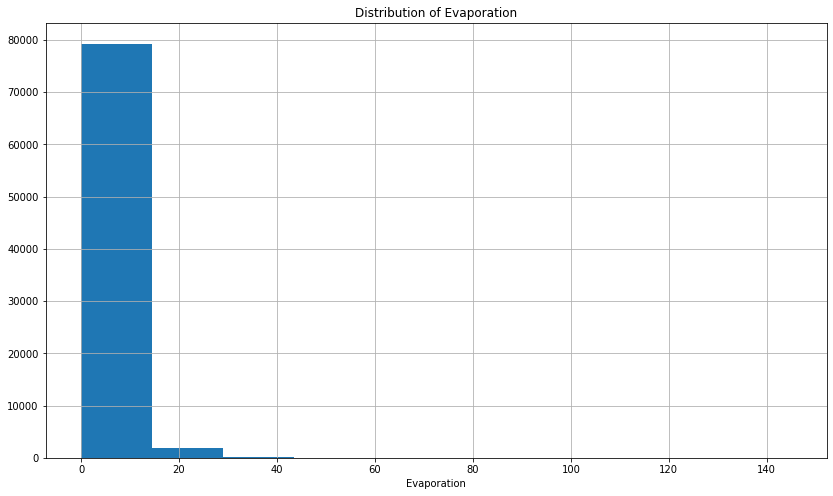

In [78]:
plt.rcParams['figure.figsize'] = [14, 8]
data.Evaporation.hist()
plt.title('Distribution of Evaporation')
plt.xlabel('Evaporation')
plt.show()

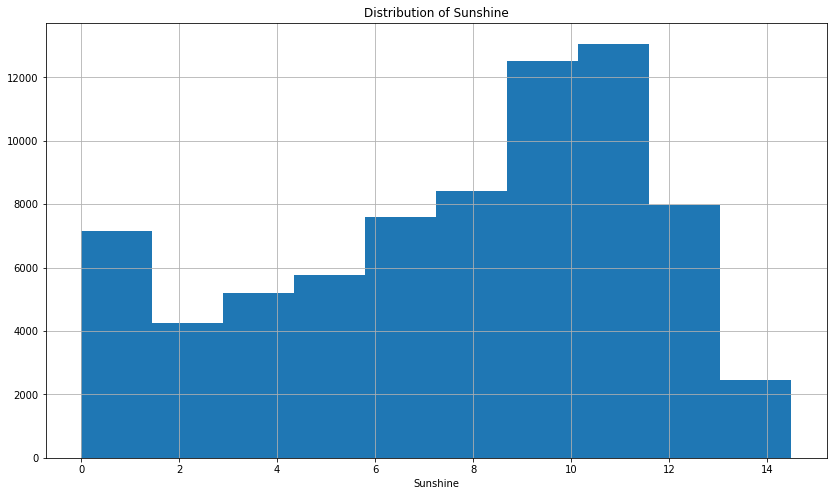

In [79]:
plt.rcParams['figure.figsize'] = [14, 8]
data.Sunshine.hist()
plt.title('Distribution of Sunshine')
plt.xlabel('Sunshine')
plt.show()

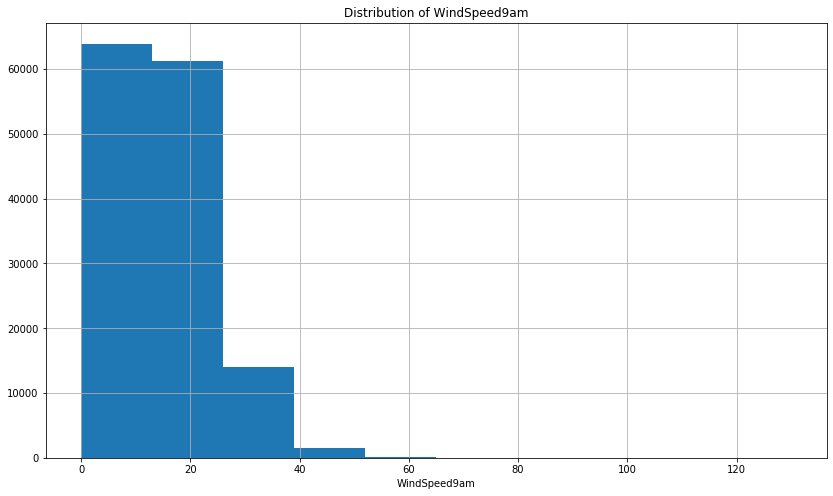

In [80]:
plt.rcParams['figure.figsize'] = [14, 8]
data.WindSpeed9am.hist()
plt.title('Distribution of WindSpeed9am')
plt.xlabel('WindSpeed9am')
plt.show()

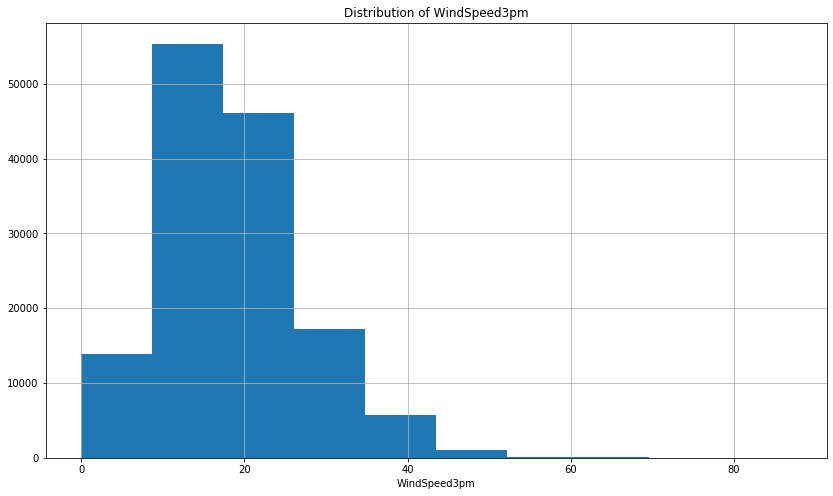

In [81]:
plt.rcParams['figure.figsize'] = [14, 8]
data.WindSpeed3pm.hist()
plt.title('Distribution of WindSpeed3pm')
plt.xlabel('WindSpeed3pm')
plt.show()

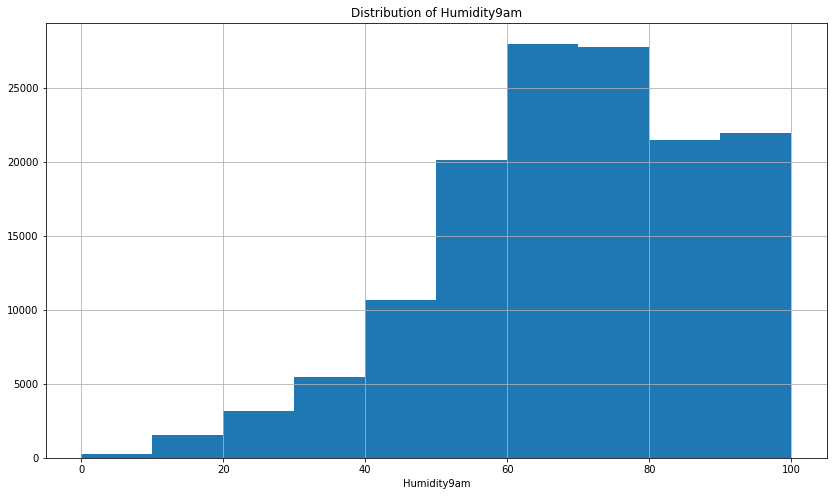

In [82]:
plt.rcParams['figure.figsize'] = [14, 8]
data.Humidity9am.hist()
plt.title('Distribution of Humidity9am')
plt.xlabel('Humidity9am')
plt.show()

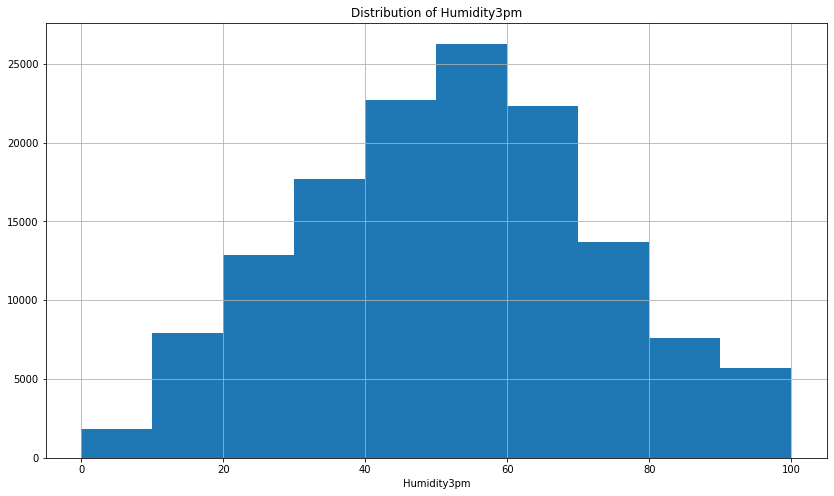

In [83]:
plt.rcParams['figure.figsize'] = [14, 8]
data.Humidity3pm.hist()
plt.title('Distribution of Humidity3pm')
plt.xlabel('Humidity3pm')
plt.show()

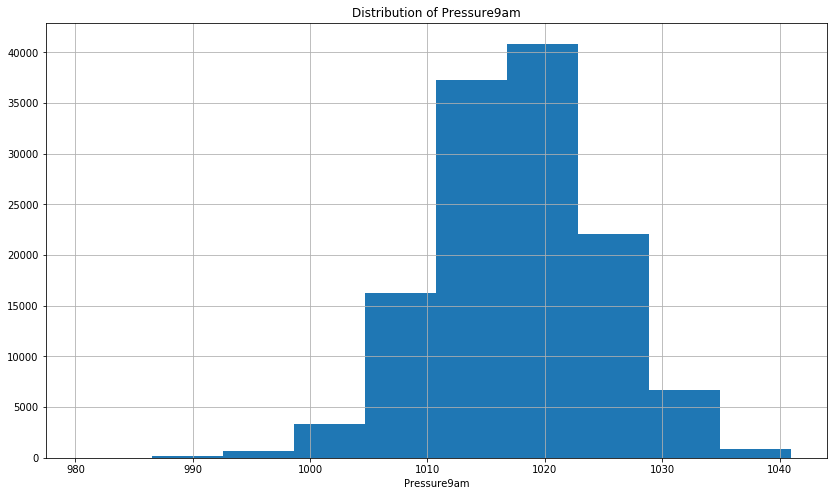

In [84]:
plt.rcParams['figure.figsize'] = [14, 8]
data.Pressure9am.hist()
plt.title('Distribution of Pressure9am')
plt.xlabel('Pressure9am')
plt.show()


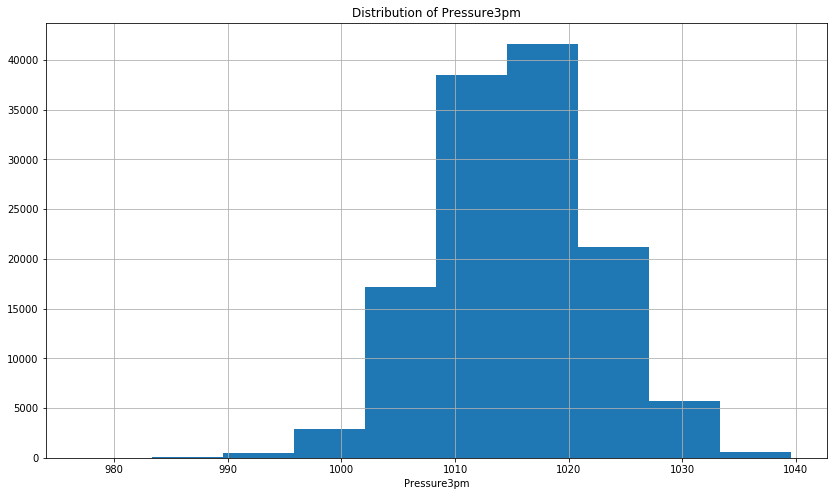

In [85]:
plt.rcParams['figure.figsize'] = [14, 8]
data.Pressure3pm.hist()
plt.title('Distribution of Pressure3pm')
plt.xlabel('Pressure3pm')
plt.show()

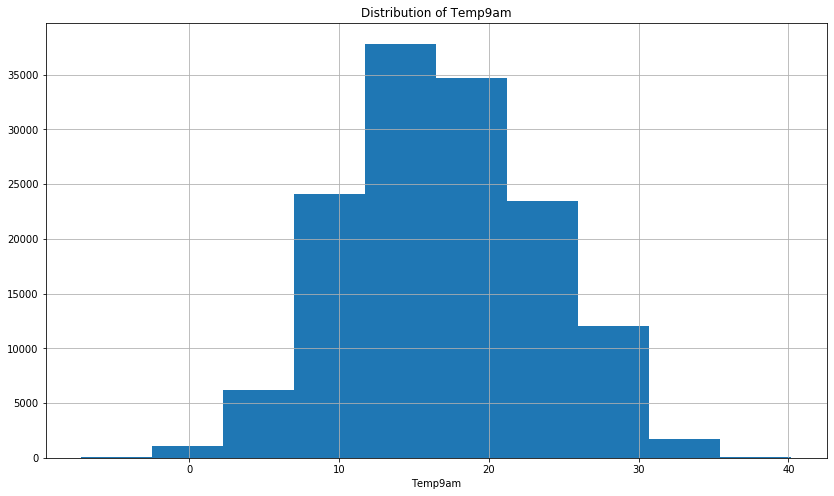

In [86]:
plt.rcParams['figure.figsize'] = [14, 8]
data.Temp9am.hist()
plt.title('Distribution of Temp9am')
plt.xlabel('Temp9am')
plt.show()

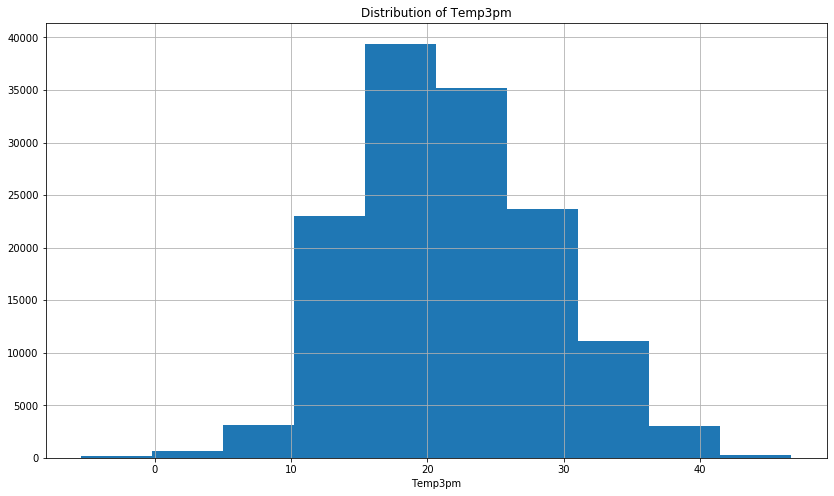

In [87]:
plt.rcParams['figure.figsize'] = [14, 8]
data.Temp3pm.hist()
plt.title('Distribution of Temp3pm')
plt.xlabel('Temp3pm')
plt.show()

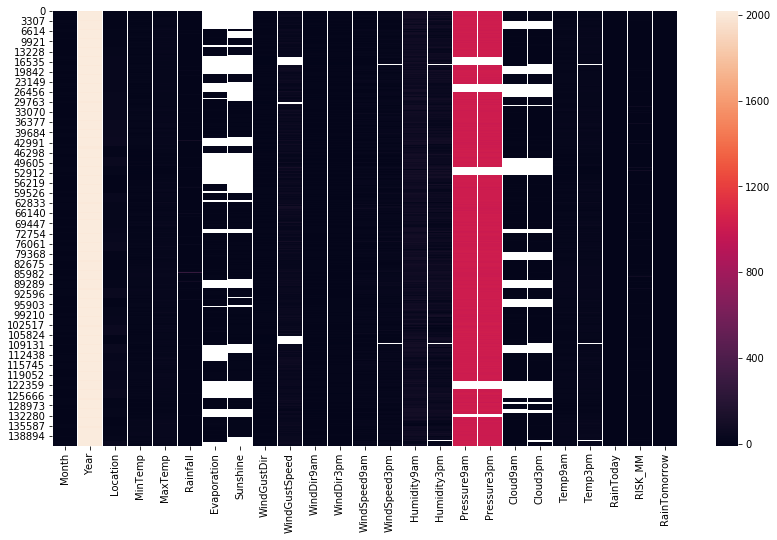

In [88]:
heat_map = sns.heatmap(data)
plt.show()

In [0]:
data['RainTomorrow'].values().plot.bar()

 # Implementing Linear Discriminant Analysis

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

In [0]:
# evaluate an LDA model on the dataset using k-fold cross validation
model1 = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=3)
result = cross_val_score(model1, transformed_X, y, cv=kfold, scoring='accuracy')
print(result)
print(result.mean())

[0.8359647  0.81919195 0.83962165 0.84024896 0.86131233]
0.8392679177277065


# Implementing Logistic Regression using train_test_split

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,train_size=0.8)

In [0]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [0]:
model2.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predicted = model2.predict(X_test)

In [0]:
model2.predict_proba(X_test)

array([[0.9218442 , 0.0781558 ],
       [0.77157296, 0.22842704],
       [0.90846417, 0.09153583],
       ...,
       [0.94037957, 0.05962043],
       [0.1129643 , 0.8870357 ],
       [0.53857757, 0.46142243]])

In [0]:
model2.score(X_test,y_test)

0.839621646330743

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[20825,  1256],
       [ 3305,  3053]])

# Implementing Logistic Regression using K fold cross validation

In [0]:
result = cross_val_score(model2, transformed_X, y, cv=kfold, scoring='accuracy')
print(result)
print(result.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.83670312 0.81940293 0.83912936 0.83522048 0.86067937]
0.8382270536928325


# Implementing Decision tree using train_test_split

In [0]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)


In [0]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [0]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
dot_data=StringIO()

In [0]:
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True)

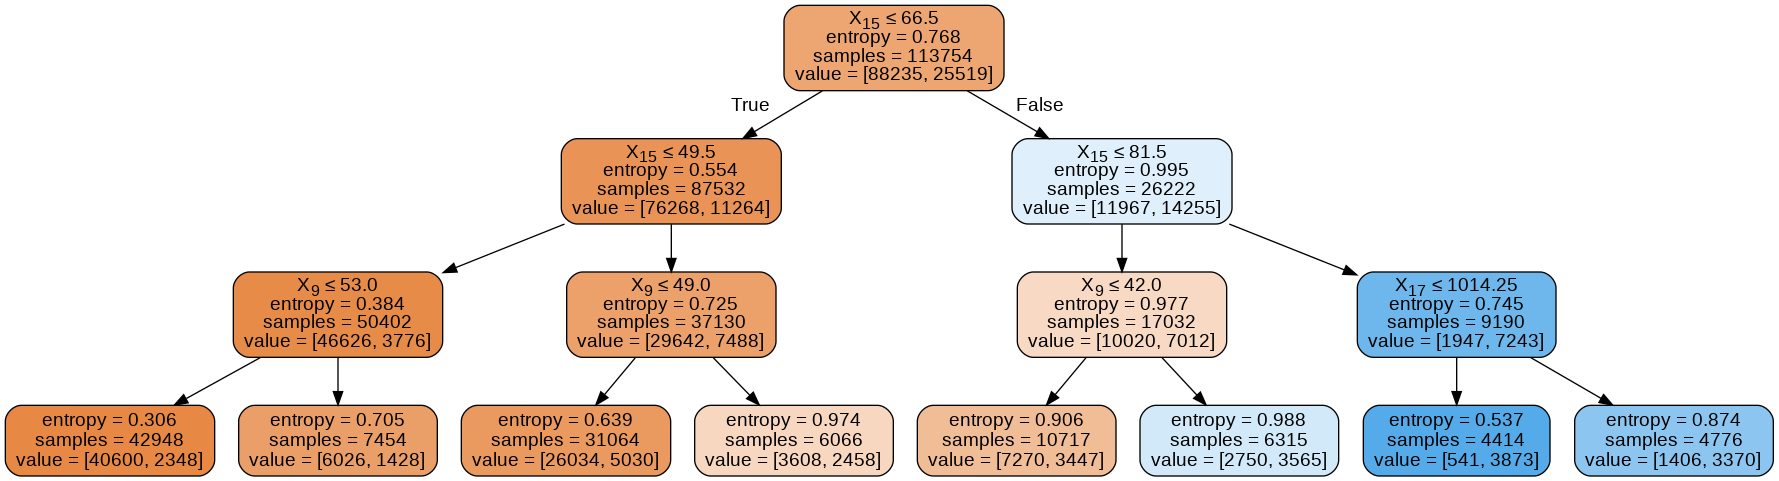

In [0]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [0]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8259784099300257


# Implementing Decision tree using k fold cross validation

In [0]:
result = cross_val_score(clf, transformed_X, y, cv=kfold, scoring='accuracy')
print(result)
print(result.mean())

[0.83069025 0.80941665 0.81796125 0.82277235 0.84460933]
0.8250899636532397


# Implementing Random Forest using train_test_split

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [0]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

In [0]:
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred1=rfc.predict(X_test)

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.8556911283800415


# Implementing Random Forest using k fold cross validation

In [0]:
result = cross_val_score(rfc, transformed_X, y, cv=kfold, scoring='accuracy')
print(result)
print(result.mean())

[0.84686522 0.82875629 0.84152045 0.84668401 0.86152331]
0.8450698562349466


# Implementing SVM

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [0]:
from sklearn.svm import SVC
model4 = SVC()

In [0]:
model4.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
model4.score(X_test, y_test)

0.7783325714687577

# Implementing GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
gsc = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
gsc.fit(transformed_X,y)
gsc.cv_results_

In [0]:
data[['param_C','param_kernel','mean_test_score']]

NameError: ignored

In [0]:
gsc.best_params_

In [0]:
gsc.best_score_

# Using Naive Bayes 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y)

In [92]:
X_train.shape

(106644, 23)

In [93]:
X_train.clip(0)

array([[3.000e+00, 2.009e+03, 2.700e+01, ..., 2.190e+01, 2.240e+01,
        1.000e+00],
       [1.000e+01, 2.012e+03, 2.300e+01, ..., 7.000e-01, 4.800e+00,
        0.000e+00],
       [9.000e+00, 2.009e+03, 9.000e+00, ..., 9.400e+00, 1.480e+01,
        0.000e+00],
       ...,
       [7.000e+00, 2.014e+03, 1.100e+01, ..., 1.480e+01, 1.680e+01,
        0.000e+00],
       [8.000e+00, 2.016e+03, 3.500e+01, ..., 5.600e+00, 1.180e+01,
        0.000e+00],
       [4.000e+00, 2.017e+03, 0.000e+00, ..., 2.070e+01, 2.720e+01,
        0.000e+00]])

In [0]:
X_train[X_train<0]=0

In [98]:
d=np.negative(X_train)
d

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [99]:
from sklearn.naive_bayes import MultinomialNB
model5 = MultinomialNB()
model5.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [100]:
from sklearn import metrics

model5.score(X_test, y_test)

0.7769276210301275

# Implementing KNN

In [0]:
#Performing feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8336099468339475


# Using SMOTE on Logistic Regression

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)

In [0]:
model2.fit(X_train_oversampled, y_train_oversampled)

In [0]:
y_predicted = model2.predict(X_test)

In [0]:
model2.predict_proba(X_test)

In [0]:
model2.score(X_test,y_test)

# Using SMOTE on Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()  
clf.fit(X_train_oversampled, y_train_oversampled)  
y_pred = clf.predict(X_test)


In [0]:
print(f'Accuracy: {model.score(X_test, y_test)}')

# Using SMOTE on Random Forest

In [0]:
rfc.fit(X_train_oversampled, y_train_oversampled)
y_pred1=rfc.predict(X_test)


In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
